**ТОП-n наиболее популярных мужских именах среди новорожденных в г. Москве**

В России нет единой статистики имен среди новорожденных детей.

Статистика по именам среди новорожденных не является обязательной для органов ЗАГС и формируется некоторыми регионами в качестве познавательно-развлекательной.

Топ-10 популярных имен в разных регионах России может различаться.   


Источник данных - https://data.mos.ru/opendata/ (Портал открытых данных г.Москва)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from io import BytesIO
import requests

In [2]:
from io import BytesIO
import requests
spreadsheet_id = '1qJuojmBditoeP-P0zCstcBDDPgCI3MmKiqB-PPYYAIA'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df.head()

,Unnamed: 0,ID,Name,NumberOfPersons,global_id,Year,Month,Unnamed: 6
0,0,1,Александр,253,37750243,2015,январь,NaN
1,1,2,Михаил,247,37750244,2015,январь,NaN
2,2,3,Иван,226,37750245,2015,январь,NaN
3,3,4,Максим,208,37750246,2015,январь,NaN
4,4,5,Артём,190,37750247,2015,январь,NaN


**Данные загружены,требуется предобработка: привести в порядок даты, проверить на пропуски и дубликаты.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
Unnamed: 0         8000 non-null int64
ID                 8000 non-null int64
Name               8000 non-null object
NumberOfPersons    8000 non-null int64
global_id          8000 non-null int64
Year               8000 non-null int64
Month              8000 non-null object
Unnamed: 6         0 non-null float64
dtypes: float64(1), int64(5), object(2)
memory usage: 500.1+ KB


**Приведем наименование переменных и имен к нижнему регистру, и изменим намименование одной переменной**

In [4]:
df.columns = map(str.lower, df.columns)
df['month'] = df['month'].str.lower()
df['name'] = df['name'].str.lower()
df.rename(columns={'numberofpersons':'count'},  inplace=True)


**Приведем даты в читаемый вид**

In [5]:
df.loc[df['month']=='январь', 'month'] = 1
df.loc[df['month']=='февраль', 'month'] = 2
df.loc[df['month']=='март', 'month'] = 3
df.loc[df['month']=='апрель', 'month'] = 4
df.loc[df['month']=='май', 'month'] = 5
df.loc[df['month']=='июнь', 'month'] = 6
df.loc[df['month']=='июль', 'month'] = 7
df.loc[df['month']=='август', 'month'] = 8
df.loc[df['month']=='сентябрь', 'month'] = 9
df.loc[df['month']=='октябрь', 'month'] = 10
df.loc[df['month']=='ноябрь', 'month'] = 11
df.loc[df['month']=='декабрь', 'month'] = 12

In [6]:
df.head()

,unnamed: 0,id,name,count,global_id,year,month,unnamed: 6
0,0,1,александр,253,37750243,2015,1,NaN
1,1,2,михаил,247,37750244,2015,1,NaN
2,2,3,иван,226,37750245,2015,1,NaN
3,3,4,максим,208,37750246,2015,1,NaN
4,4,5,артём,190,37750247,2015,1,NaN


In [7]:
df['month'] = df['month'].astype(str)
df['year'] = df['year'].astype(str)
df['date'] = df['year'] + " " + df['month']
df['date'] = pd.to_datetime(df['date'])
df.head()

,unnamed: 0,id,name,count,global_id,year,month,unnamed: 6,date
0,0,1,александр,253,37750243,2015,1,NaN,2015-01-01
1,1,2,михаил,247,37750244,2015,1,NaN,2015-01-01
2,2,3,иван,226,37750245,2015,1,NaN,2015-01-01
3,3,4,максим,208,37750246,2015,1,NaN,2015-01-01
4,4,5,артём,190,37750247,2015,1,NaN,2015-01-01


**Выведем топ 20 имен за весь период**

In [8]:
top = df.groupby(['name']).agg({'count':['sum']}).reset_index()
top.columns = ['name', 'count']
top.sort_values(by='count',ascending=False, inplace=True)
top.reset_index(inplace=True)
top = top.drop('index', 1)
top.head(20)

,name,count
0,александр,20264
1,михаил,17803
2,максим,17710
3,артём,15433
4,иван,14568
5,дмитрий,12763
6,марк,9743
7,матвей,9679
8,кирилл,9326
9,андрей,9033


**Создадим сводную таблицу популярности имен по годам**

In [9]:
pivot = pd.pivot_table(df,
                       index=["name"],
                       values=["count"],
                       columns=["year"],
                       aggfunc=np.sum,
                       fill_value=0,
                       margins=True)


pivot.columns = ['2015','2016','2017','2018','2019','2020','2021', 'total']
pivot.sort_values(by='total', ascending=False, inplace=True)
pivot.reset_index(inplace=True)  
pivot.head(20)

,name,2015,2016,2017,2018,2019,2020,2021,total
0,All,63875,64496,59132,58298,58090,50432,34018,388341
1,александр,3352,3366,3199,3156,2991,2521,1679,20264
2,михаил,2845,2913,2680,2672,2766,2424,1503,17803
3,максим,3039,3131,2569,2536,2602,2281,1552,17710
4,артём,2686,2563,2634,2425,2162,1824,1139,15433
5,иван,2660,2561,2286,2198,2129,1617,1117,14568
6,дмитрий,2294,2318,1972,1874,1833,1501,971,12763
7,марк,1209,1410,1314,1455,1597,1665,1093,9743
8,матвей,1438,1483,1462,1433,1485,1458,920,9679
9,кирилл,1764,1646,1478,1333,1347,1042,716,9326


**Имена отстортированы по суммарному кол-ву за весь период**  
В данных наблюдаем пропуск по имени "Даниил" за год 2017 год.

**Выведем топ-20 в отдельную структуру**

In [10]:
pivot_top20 = pivot.head(20)
list2 = pivot_top20['name']
df2 = df.query('name in @list2')
df2

,unnamed: 0,id,name,count,global_id,year,month,unnamed: 6,date
0,0,1,александр,253,37750243,2015,1,NaN,2015-01-01
1,1,2,михаил,247,37750244,2015,1,NaN,2015-01-01
2,2,3,иван,226,37750245,2015,1,NaN,2015-01-01
3,3,4,максим,208,37750246,2015,1,NaN,2015-01-01
4,4,5,артём,190,37750247,2015,1,NaN,2015-01-01
...,...,...,...,...,...,...,...,...,...
7915,7915,9016,андрей,88,1146178985,2021,8,NaN,2021-08-01
7916,7916,9017,никита,87,1146178986,2021,8,NaN,2021-08-01
7917,7917,9018,алексей,78,1146178987,2021,8,NaN,2021-08-01
7920,7920,9021,владимир,67,1146178990,2021,8,NaN,2021-08-01


**Создадим функцию проверки неявных дубликатов имён** 

In [11]:
def check(name):
    ax = df[df['name'].str.contains(name) == True]
    ax = ax[ax['name']!=name]
    if len(ax) > 0:
        print('Проверяем имя:', name)
        print(ax)
        print(ax.groupby('year')['count'].sum(),"\n")

**Проверим топ 20 имен**   Функция находит строки которые содержат указанное имя и еще какие либо симоволы.

In [12]:
for i in list2:
    check(i)

Проверяем имя: максим
     unnamed: 0   id         name  count  global_id  year month  unnamed: 6  \
150         150  787  максимилиан      9   62365989  2015     8         NaN   
262         262  899  максимилиан      6   62366104  2015     9         NaN   

          date  
150 2015-08-01  
262 2015-09-01  
year
2015    15
Name: count, dtype: int64 

Проверяем имя: артём
      unnamed: 0    id          name  count  global_id  year month  \
1483        1483  2204  артём, артем    246  282201011  2016    11   

      unnamed: 6       date  
1483         NaN 2016-11-01  
year
2016    246
Name: count, dtype: int64 

Проверяем имя: лев
      unnamed: 0    id   name  count   global_id  year month  unnamed: 6  \
7599        7599  8700  левон      8  1136550638  2021     4         NaN   

           date  
7599 2021-04-01  
year
2021    8
Name: count, dtype: int64 

Проверяем имя: илья
      unnamed: 0    id   name  count   global_id  year month  unnamed: 6  \
154          154   791  ильяс  

**Имеются дубликаты по имени Артём и Даниил, остальные найденные функцией строки не являются дубликатами, а являются другими самостоятельными именами.**  
Учтём найденные дубликаты в основной таблице.

In [13]:
df2

,unnamed: 0,id,name,count,global_id,year,month,unnamed: 6,date
0,0,1,александр,253,37750243,2015,1,NaN,2015-01-01
1,1,2,михаил,247,37750244,2015,1,NaN,2015-01-01
2,2,3,иван,226,37750245,2015,1,NaN,2015-01-01
3,3,4,максим,208,37750246,2015,1,NaN,2015-01-01
4,4,5,артём,190,37750247,2015,1,NaN,2015-01-01
...,...,...,...,...,...,...,...,...,...
7915,7915,9016,андрей,88,1146178985,2021,8,NaN,2021-08-01
7916,7916,9017,никита,87,1146178986,2021,8,NaN,2021-08-01
7917,7917,9018,алексей,78,1146178987,2021,8,NaN,2021-08-01
7920,7920,9021,владимир,67,1146178990,2021,8,NaN,2021-08-01


In [14]:
df2.query('name == "артём" and year == "2016"')

,unnamed: 0,id,name,count,global_id,year,month,unnamed: 6,date
1203,1203,1204,артём,209,64506258,2016,1,NaN,2016-01-01
1303,1303,1304,артём,229,140201231,2016,2,NaN,2016-02-01
1313,1313,1404,артём,221,167860307,2016,3,NaN,2016-03-01
1321,1321,1502,артём,266,169691967,2016,4,NaN,2016-04-01
1422,1422,1603,артём,254,170907812,2016,5,NaN,2016-05-01
1434,1434,1705,артём,236,171626643,2016,6,NaN,2016-06-01
1444,1444,1805,артём,219,272397830,2016,7,NaN,2016-07-01
1452,1452,1903,артём,260,273024741,2016,8,NaN,2016-08-01
1463,1463,2004,артём,228,279024133,2016,9,NaN,2016-09-01
1473,1473,2104,артём,217,281754941,2016,10,NaN,2016-10-01


In [15]:
new_row = {'name':'артём', 'count':246, 'year':'2016', 'month':'11'} 
df = df.append(new_row, ignore_index=True)


**По имени "Даниил" достаточно много дубликатов разных годов и месяцев, поэтому добавим сгруппированные данные по году без указания месяца**

In [16]:
new_row = {'name':'даниил', 'count':187, 'year':'2016', 'month':'0'} 
new_row2 = {'name':'даниил', 'count':2407, 'year':'2017', 'month':'0'} 
new_row3 = {'name':'даниил', 'count':1732, 'year':'2018', 'month':'0'} 

df = df.append([new_row, new_row2, new_row3], ignore_index=True)

**Удалим дубликаты**

In [17]:
df = df.loc[df['name'] != 'даниил, данила, данил']
df = df.loc[df['name'] != 'артём, артем']

**Обновим сводную таблицу**

In [18]:
pivot = pd.pivot_table(df,
                       index=["name"],
                       values=["count"],
                       columns=["year"],
                       aggfunc=np.sum,
                       fill_value=0,
                       margins=True)


pivot.columns = ['2015','2016','2017','2018','2019','2020','2021', 'total']
pivot.sort_values(by='total', ascending=False, inplace=True)
pivot.reset_index(inplace=True)  
pivot.head(20)

,name,2015,2016,2017,2018,2019,2020,2021,total
0,All,63875,64683,59132,58298,58090,50432,34018,388528
1,александр,3352,3366,3199,3156,2991,2521,1679,20264
2,михаил,2845,2913,2680,2672,2766,2424,1503,17803
3,максим,3039,3131,2569,2536,2602,2281,1552,17710
4,артём,2686,2809,2634,2425,2162,1824,1139,15679
5,иван,2660,2561,2286,2198,2129,1617,1117,14568
6,даниил,2121,2140,2407,2144,1674,1479,906,12871
7,дмитрий,2294,2318,1972,1874,1833,1501,971,12763
8,марк,1209,1410,1314,1455,1597,1665,1093,9743
9,матвей,1438,1483,1462,1433,1485,1458,920,9679


**Создадим функцию вывода графика динамики популярности ТОП-n имен.**

In [19]:
def top(number):
    pivot_top = pivot.head(number)
    list2 = pivot_top['name']
    fx = df.query('name in @list2')
    
    fx2 = fx.groupby(['name', 'year']).agg({'count':['sum']}).reset_index()
    fx2.columns = ['name', 'year', 'count']
    fx2['name'] = fx2['name'].str.title()
    
    sns.relplot(data=fx2, x='year', y='count', hue='name', kind='line', aspect=18/8, palette = "bright")
    plt.title('Динамика популярности мужских имен')
    plt.ylabel('Кол-во')
    plt.xlabel('Год');

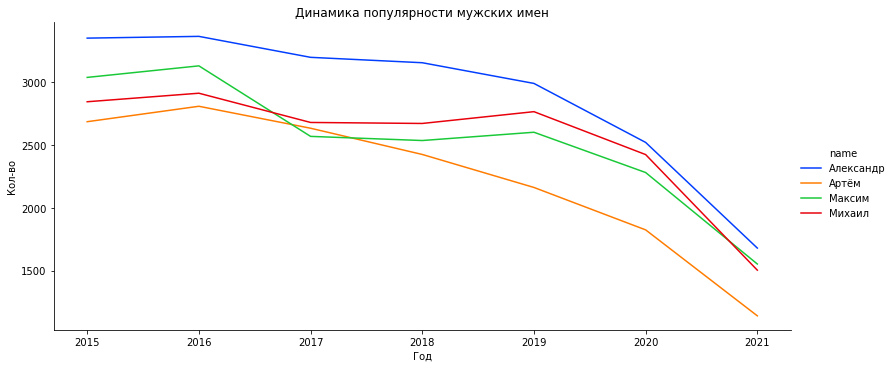

In [20]:
top(5)

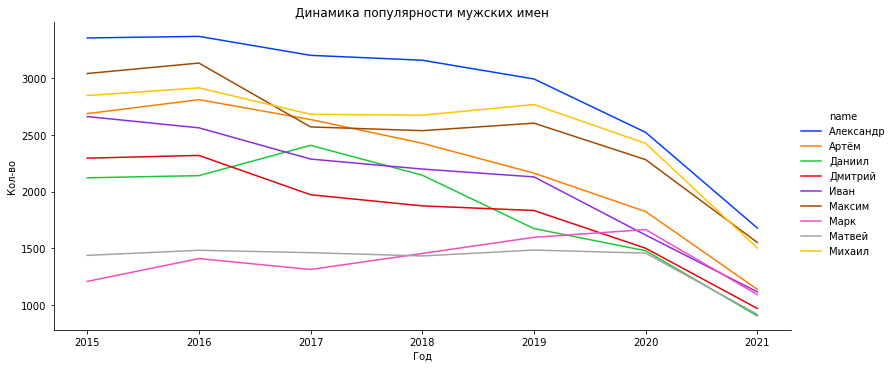

In [21]:
top(10)

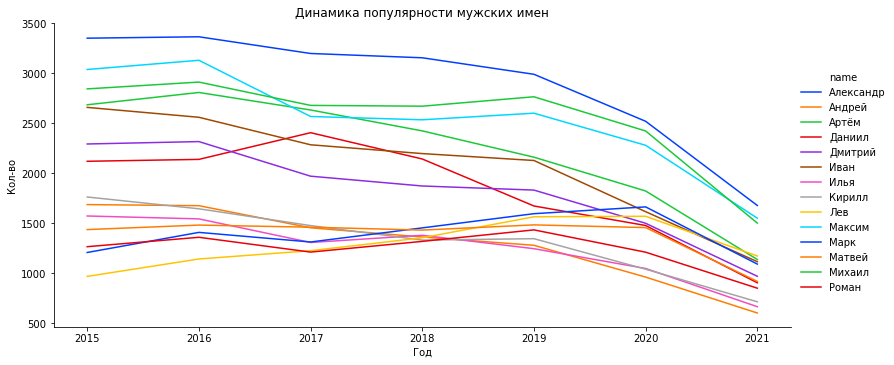

In [22]:
top(15)

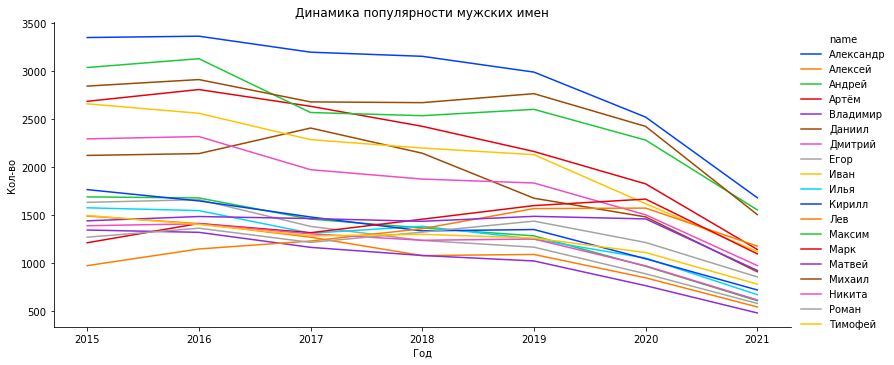

In [23]:
top(20)

In [24]:
pivot = pivot.drop('total', 1)
pivot = pivot.drop(index=[0])
pivot['name'] = pivot['name'].str.title()
pivot.head(20)

,name,2015,2016,2017,2018,2019,2020,2021
1,Александр,3352,3366,3199,3156,2991,2521,1679
2,Михаил,2845,2913,2680,2672,2766,2424,1503
3,Максим,3039,3131,2569,2536,2602,2281,1552
4,Артём,2686,2809,2634,2425,2162,1824,1139
5,Иван,2660,2561,2286,2198,2129,1617,1117
6,Даниил,2121,2140,2407,2144,1674,1479,906
7,Дмитрий,2294,2318,1972,1874,1833,1501,971
8,Марк,1209,1410,1314,1455,1597,1665,1093
9,Матвей,1438,1483,1462,1433,1485,1458,920
10,Кирилл,1764,1646,1478,1333,1347,1042,716


In [25]:
pivot.head(50)

,name,2015,2016,2017,2018,2019,2020,2021
1,Александр,3352,3366,3199,3156,2991,2521,1679
2,Михаил,2845,2913,2680,2672,2766,2424,1503
3,Максим,3039,3131,2569,2536,2602,2281,1552
4,Артём,2686,2809,2634,2425,2162,1824,1139
5,Иван,2660,2561,2286,2198,2129,1617,1117
6,Даниил,2121,2140,2407,2144,1674,1479,906
7,Дмитрий,2294,2318,1972,1874,1833,1501,971
8,Марк,1209,1410,1314,1455,1597,1665,1093
9,Матвей,1438,1483,1462,1433,1485,1458,920
10,Кирилл,1764,1646,1478,1333,1347,1042,716
